In [1]:
!cp /content/drive/MyDrive/archive.zip .
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [2]:
!ls

archive.zip  meta  Meta.csv	test  Test.csv	Train
drive	     Meta  sample_data	Test  train	Train.csv


In [3]:
import os

In [4]:
import cv2
import numpy as np

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
IMG_SIZE = 32
NUM_CLASSES = 43
DATA_DIR = "Train"

In [8]:
images = []
labels = []

In [9]:
for label in range(NUM_CLASSES):
    folder = os.path.join(DATA_DIR, str(label))
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        images.append(img)
        labels.append(label)

In [10]:
X = np.array(images) / 255.0
y = to_categorical(labels, NUM_CLASSES)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)

(31367, 32, 32, 3) (31367, 43)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4829 - loss: 1.9397 - val_accuracy: 0.9360 - val_loss: 0.2418
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9494 - loss: 0.1906 - val_accuracy: 0.9730 - val_loss: 0.1129
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9784 - loss: 0.0861 - val_accuracy: 0.9830 - val_loss: 0.0752
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9856 - loss: 0.0553 - val_accuracy: 0.9815 - val_loss: 0.0782
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9898 - loss: 0.0408 - val_accuracy: 0.9824 - val_loss: 0.0715
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9932 - loss: 0.0241 - val_accuracy: 0.9862 - val_loss: 0.0585
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9924 - loss: 0.0234 - val_accuracy: 0.9894 - val_loss: 0.0498
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9955 - loss: 0.0176 - val_accuracy: 0

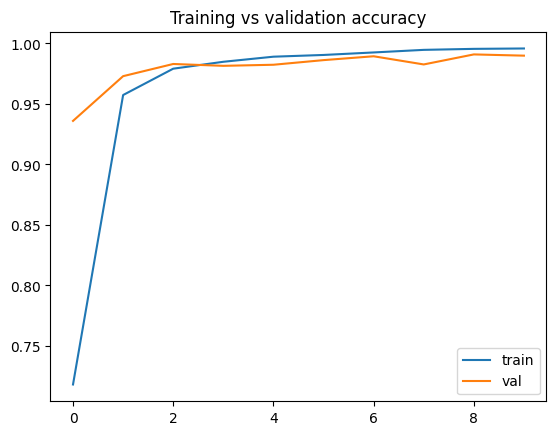

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.title("Training vs validation accuracy")
plt.show()

In [16]:
import matplotlib.pyplot as plt

def predict_image(path):
    true_label = path.split("/")[-2]

    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (32, 32))

    img_norm = img_resized / 255.0
    img_input = np.expand_dims(img_norm, axis=0)

    pred = model.predict(img_input)
    predicted_class = np.argmax(pred)

    plt.imshow(img_rgb)
    plt.title(f"True: {true_label} | Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


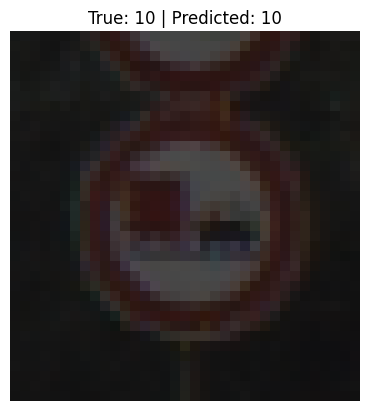

In [17]:
predict_image("Train/10/00010_00000_00001.png")

In [22]:
import pandas as pd

test_df = pd.read_csv("Test.csv")
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [26]:
test_df.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

In [27]:
test_images = []
test_labels = []

for _, row in test_df.iterrows():
    img_path = row["Path"]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    test_images.append(img)
    test_labels.append(row["ClassId"])

X_test = np.array(test_images) / 255.0
y_test = to_categorical(test_labels, NUM_CLASSES)

print(X_test.shape, y_test.shape)

(12630, 32, 32, 3) (12630, 43)


In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9324 - loss: 0.3675
Test accuracy: 0.9304829835891724


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


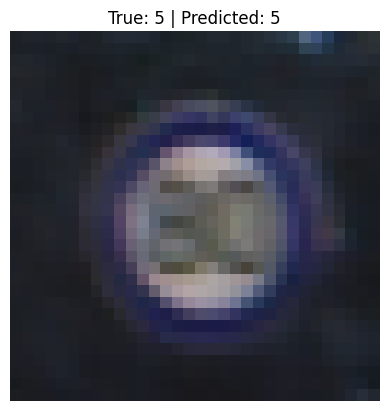

In [29]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, len(X_test) - 1)

img = X_test[idx]
true_label = np.argmax(y_test[idx])
pred = np.argmax(model.predict(img.reshape(1,32,32,3)))

plt.imshow(img)
plt.title(f"True: {true_label} | Predicted: {pred}")
plt.axis("off")
plt.show()
